In [11]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np
import ipywidgets as widgets

In [4]:
data = pd.read_csv('../data/cleaned_dataset.csv')

print("\nSample Data:")
print(data.head())
print("\nDescriptive Statistics:")
print(data.describe())
print("\nDataset Info:")
data.info()


Sample Data:
   OverallQual  GarageCars ExterQual  GrLivArea  FullBath KitchenQual  \
0            7           2        Gd       1710         2          Gd   
1            6           2        TA       1262         2          TA   
2            7           2        Gd       1786         2          Gd   
3            7           3        TA       1717         1          Gd   
4            8           3        Gd       2198         2          Gd   

   YearBuilt  1stFlrSF BsmtQual  Fireplaces  SalePrice  
0       2003       856       Gd           0     208500  
1       1976      1262       Gd           1     181500  
2       2001       920       Gd           1     223500  
3       1915       961       TA           1     140000  
4       2000      1145       Gd           1     250000  

Descriptive Statistics:
       OverallQual   GarageCars    GrLivArea     FullBath    YearBuilt  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      6.099315     1.767123 

In [5]:
print("\nColumns with Missing Values:")
print(data.isnull().sum())

print("\nRows with duplicated values:", data.duplicated().sum())


Columns with Missing Values:
OverallQual     0
GarageCars      0
ExterQual       0
GrLivArea       0
FullBath        0
KitchenQual     0
YearBuilt       0
1stFlrSF        0
BsmtQual       37
Fireplaces      0
SalePrice       0
dtype: int64

Rows with duplicated values: 0



Distribution of numerical variables:


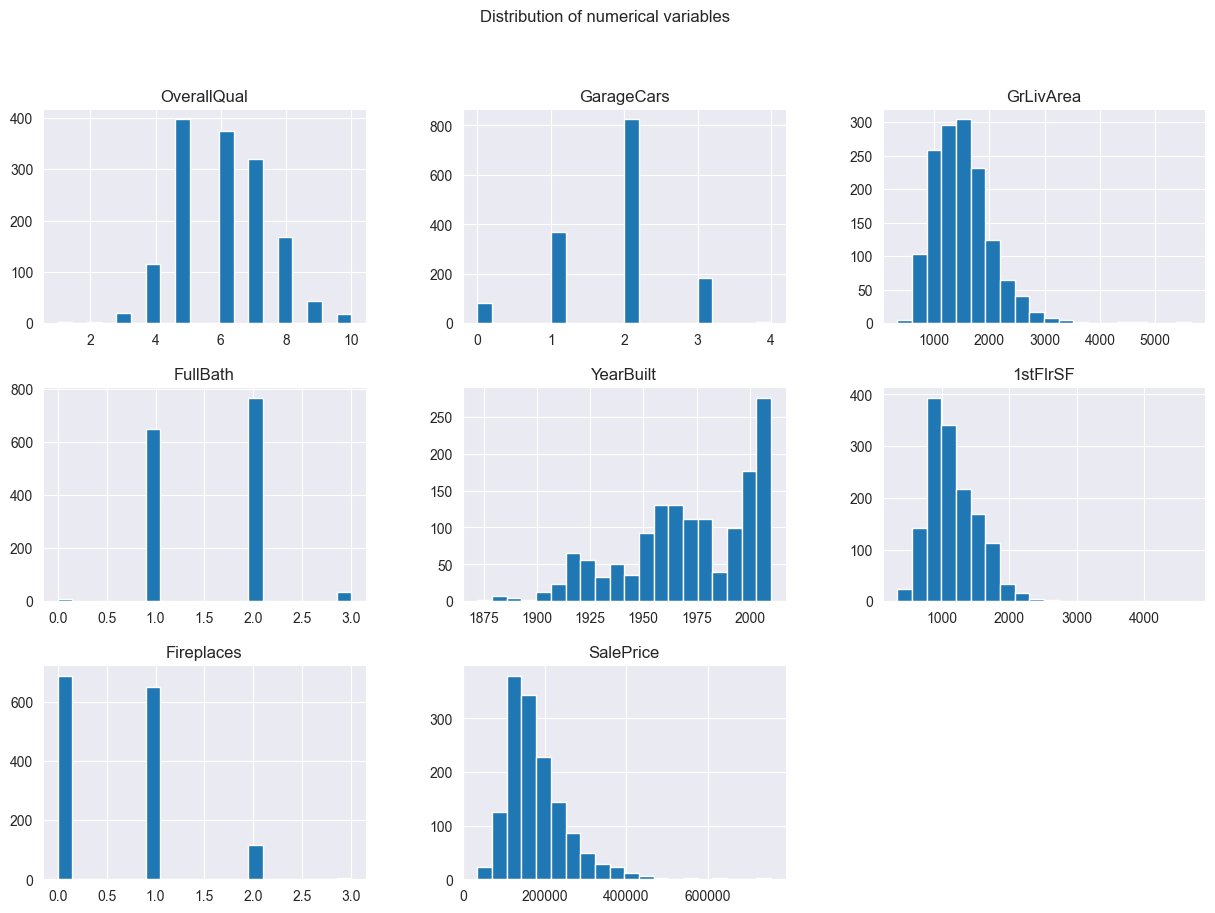

In [6]:
print("\nDistribution of numerical variables:")
data.select_dtypes(include=np.number).hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of numerical variables')
plt.show()


Distribution of categorical variables:


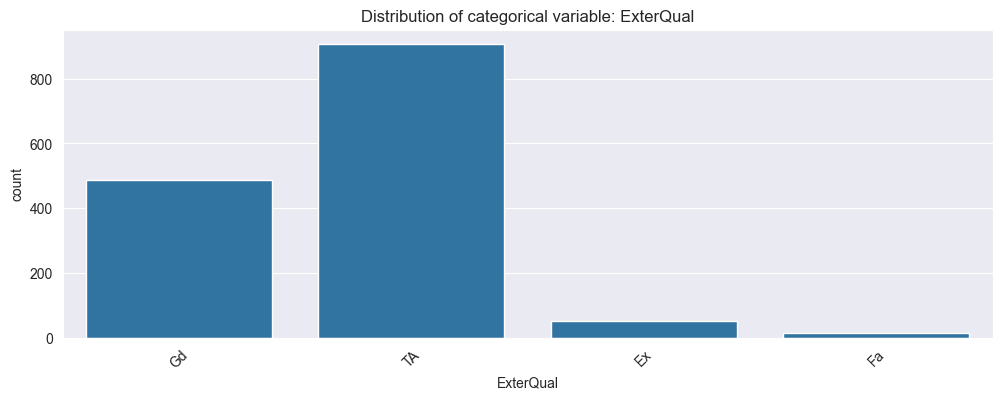

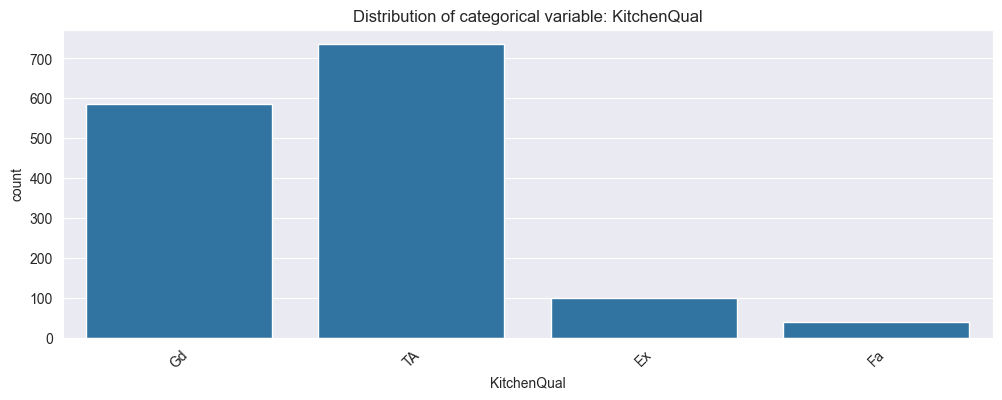

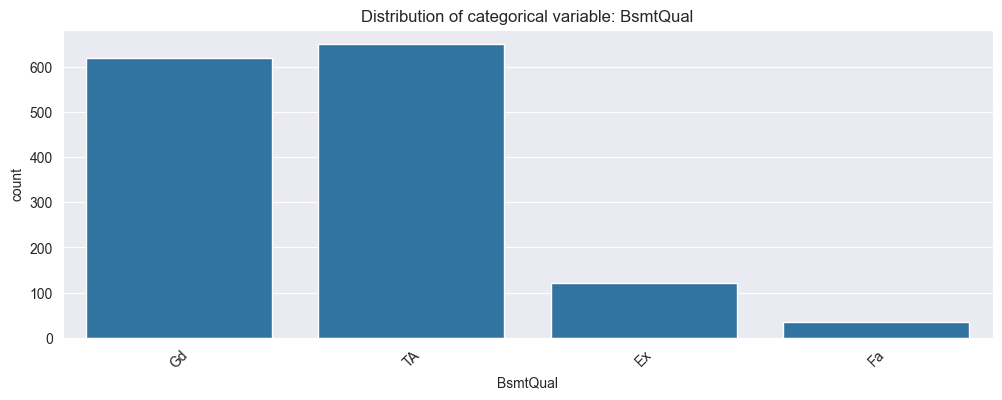

In [7]:
print("\nDistribution of categorical variables:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of categorical variable: {col}')
    plt.xticks(rotation=45)
    plt.show()


Box plots for numeric variables:


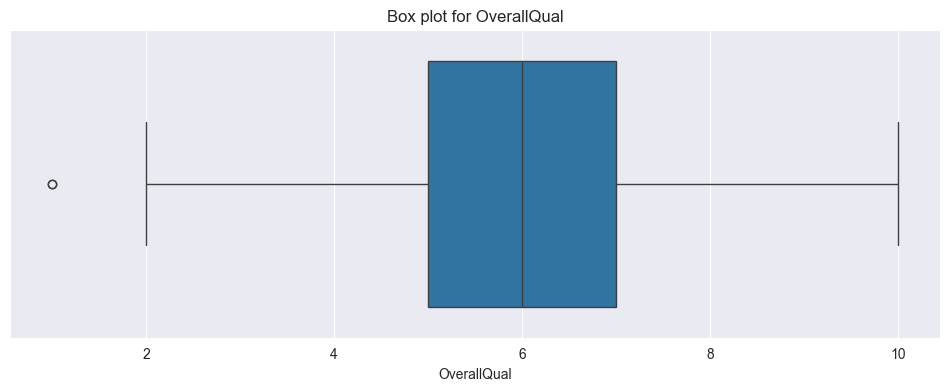

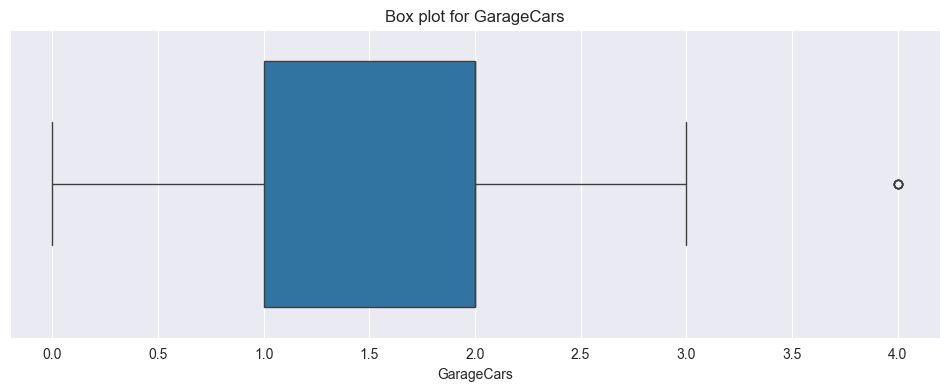

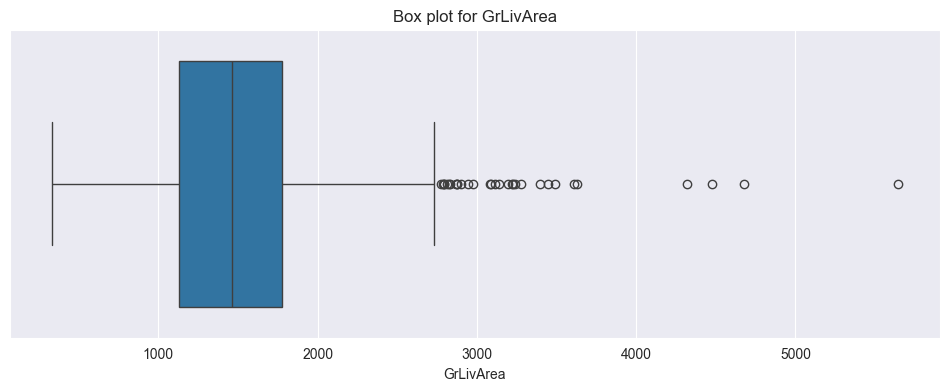

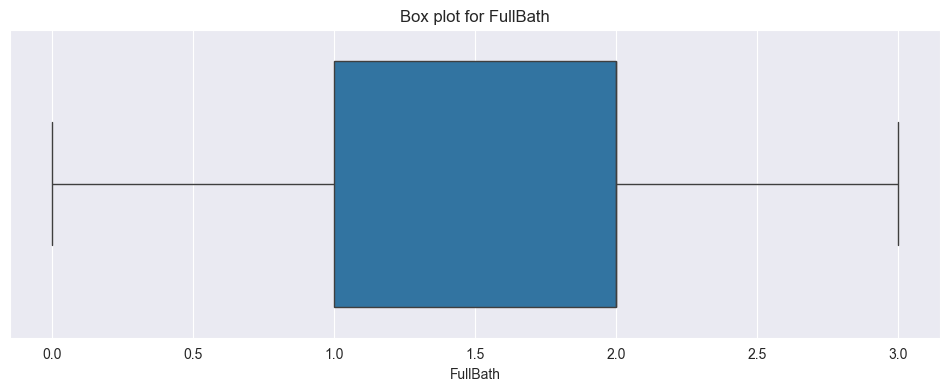

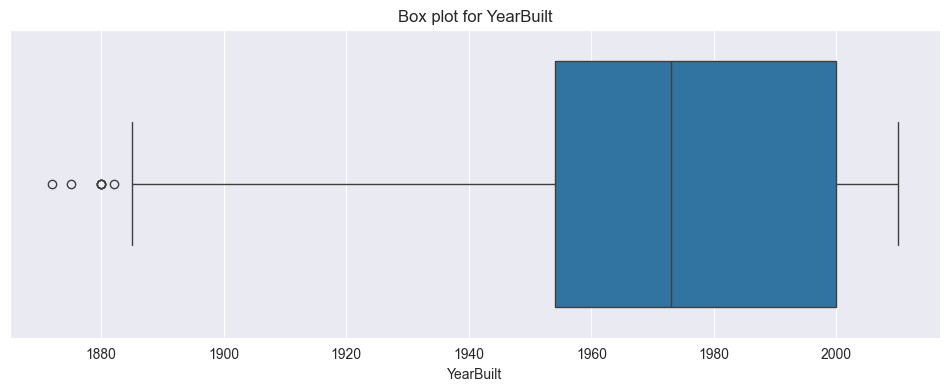

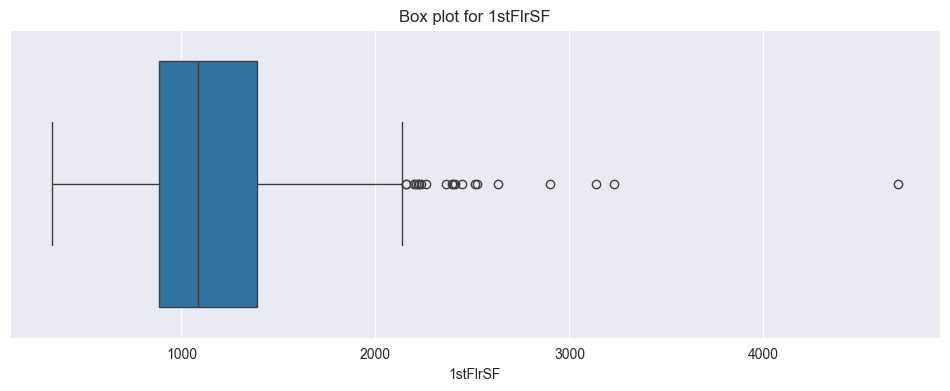

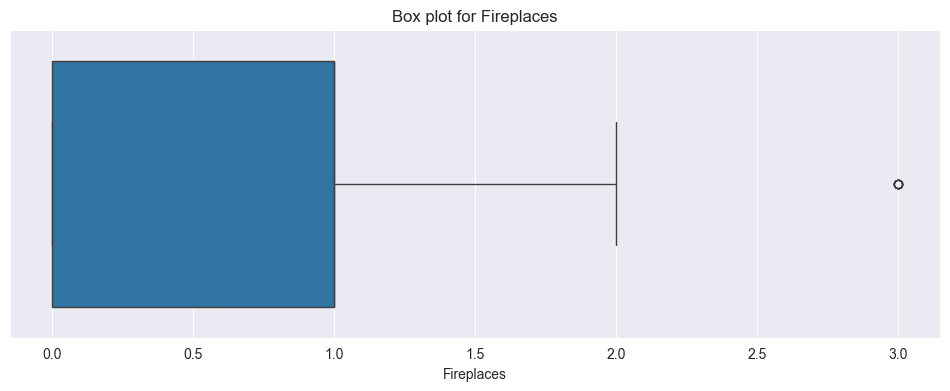

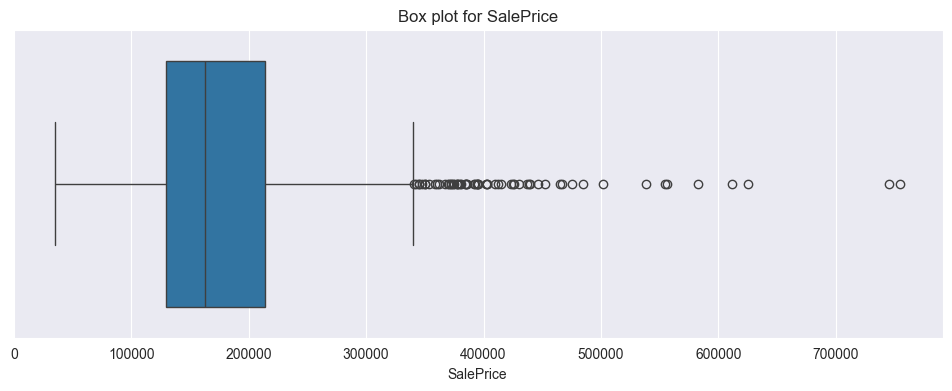

In [8]:
print("\nBox plots for numeric variables:")
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot for {col}')
    plt.show()

In [10]:


encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])


Correlation matrix:


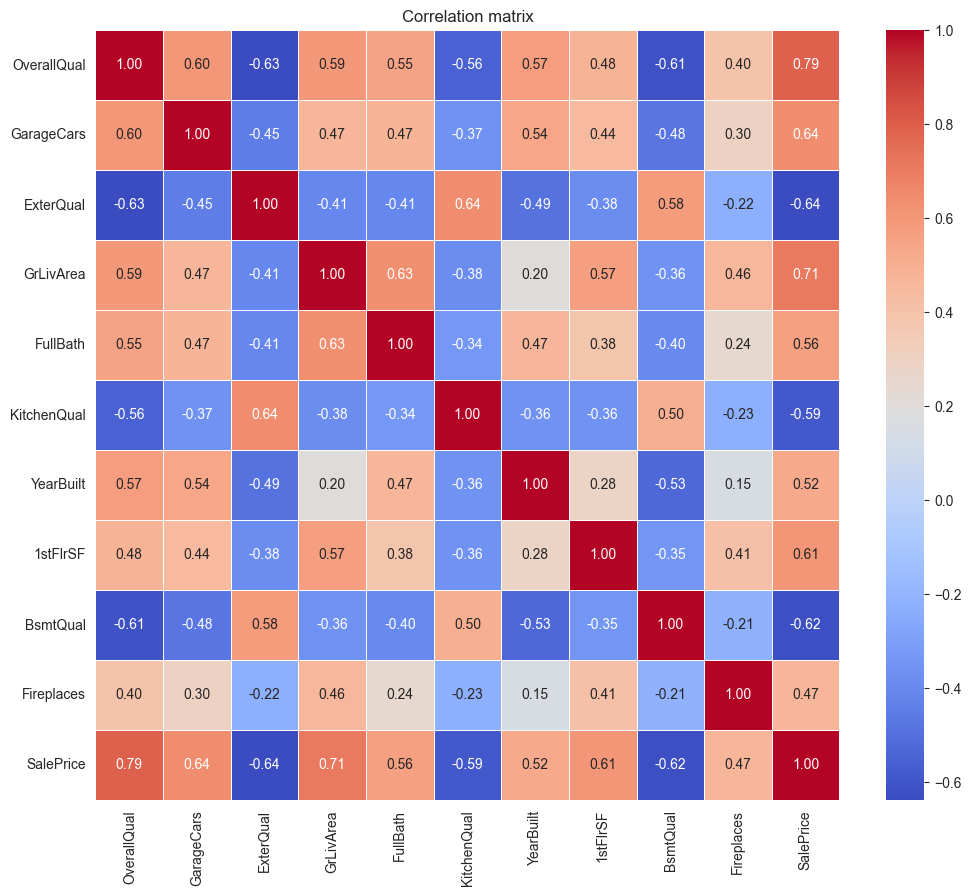

In [12]:
print("\nCorrelation matrix:")
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [13]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

features_importance = pd.Series(model.feature_importances_, index=X.columns)
features_importance = features_importance.sort_values(ascending=False)

print("Features Importance in model:")
for feature, importance in features_importance.items():
    print(f"{feature}: {importance:.4f}")

Features Importance in model:
OverallQual: 0.5966
GrLivArea: 0.1682
1stFlrSF: 0.0902
YearBuilt: 0.0496
GarageCars: 0.0364
FullBath: 0.0168
Fireplaces: 0.0138
BsmtQual: 0.0120
KitchenQual: 0.0099
ExterQual: 0.0064


In [16]:
profile = ProfileReport(data, title="House Prices")
profile.to_notebook_iframe()
profile.to_file("../reports/profile_report.html")

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 198.01it/s]
